<html>
    <body>
        <center>
        <h2>Find optimal value of 'k' in K-means Clustering </h2>
        </center>
        <br>
        <table style="width:100%">
            <tr>
                <td align="left"><b> Author </b></td>
                <td align="left"> Kavya Gajjar</td>
            </tr>
            <tr>
                <td align="left"><b> Last edited </b> </td>
                <td align="left"> 5th October, 2020</td>
            </tr>
        </table>
    </body>
</html>

In [1]:
###---- Import required libraries ---###
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('fivethirtyeight')

from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.cluster import KMeans


In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, n_features=2,random_state=0)

In [3]:
WSS = []
db = []
sil = []
K = range(2, 10)
for n in K:
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(X)
    labels = algorithm.labels_
    db.append(davies_bouldin_score(X,labels))
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))
    WSS.append(algorithm.inertia_)

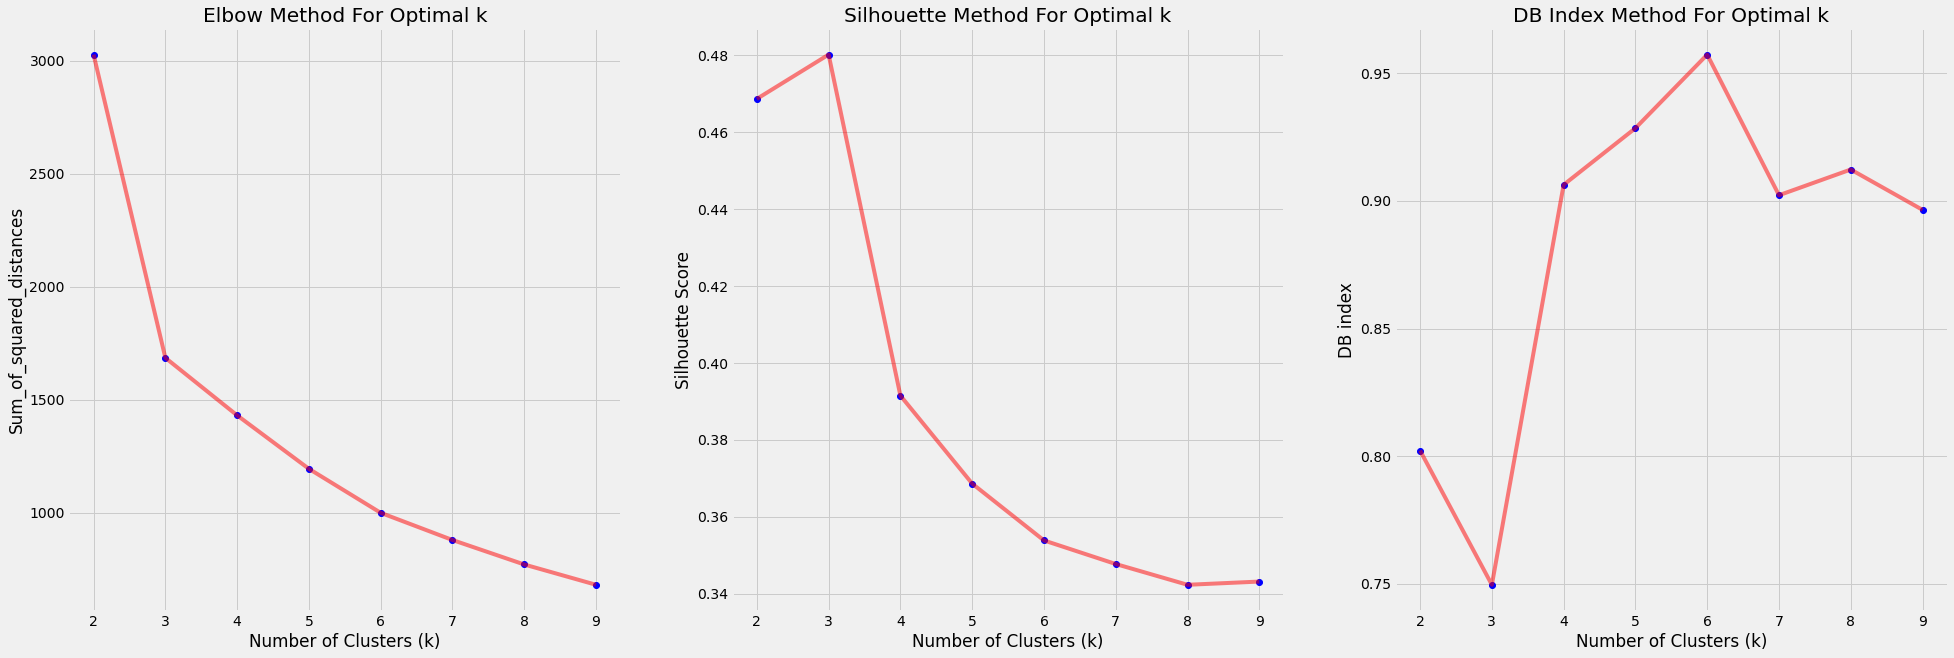

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols =3)
# fig, (ax3) = plt.subplots(ncols =1)
fig.set_figheight(10)
fig.set_figwidth(30)

ax1.plot(K, WSS, 'bo')
ax1.plot(K, WSS, 'r-', alpha = 0.5)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum_of_squared_distances')
ax1.set_title('Elbow Method For Optimal k')
ax1.grid(True)

ax2.plot(K,sil, 'bo')
ax2.plot(K, sil, 'r-', alpha = 0.5)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Method For Optimal k')
ax2.grid(True)

ax3.plot(K,db, 'bo')
ax3.plot(K, db, 'r-', alpha = 0.5)
ax3.set_xlabel('Number of Clusters (k)')
ax3.set_ylabel('DB index')
ax3.set_title('DB Index Method For Optimal k')
ax3.grid(True)

In [5]:
optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

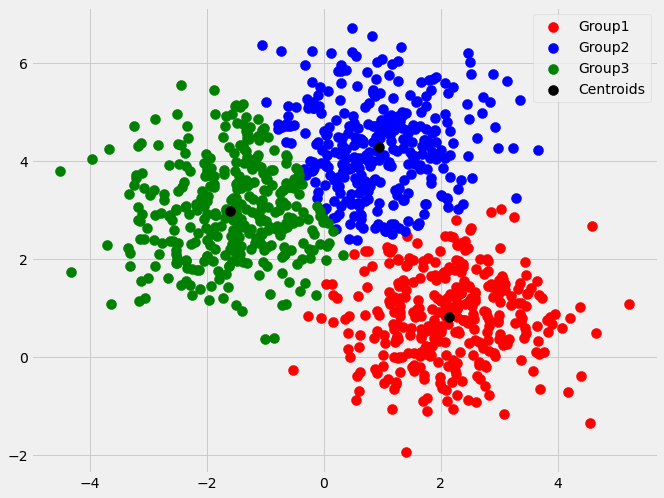

In [6]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,8))
colours = ['red','blue','green','yellow','cyan','magenta','orange','aqua','pink']
for i in range(optimal_k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = colours[i], label = 'Group'+str(i+1))

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()